# KNN

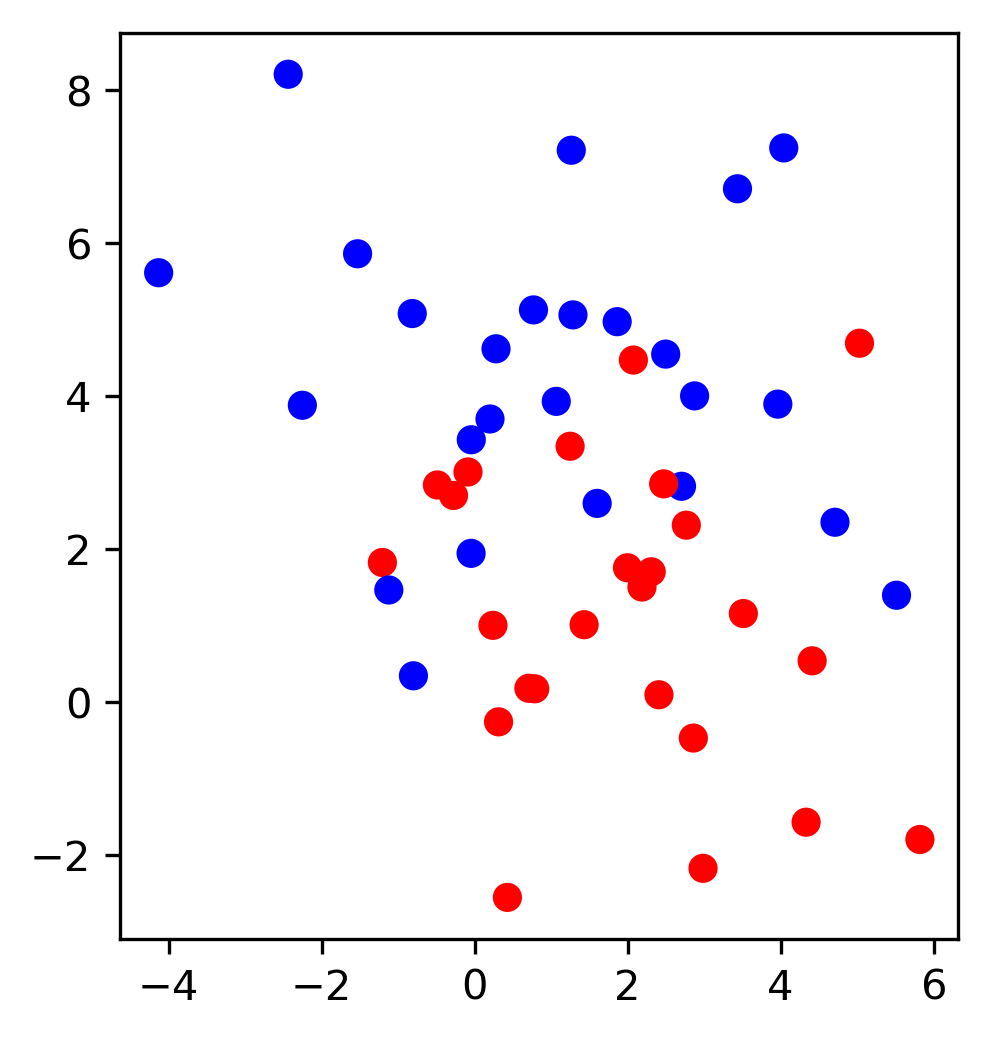

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "300"

X, y = make_blobs(centers=2, cluster_std=2, random_state=0, n_samples=50)
plt.figure()
plt.gca().set_aspect("equal")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig("knn_boundary_dataset.png", bbox_inches='tight')

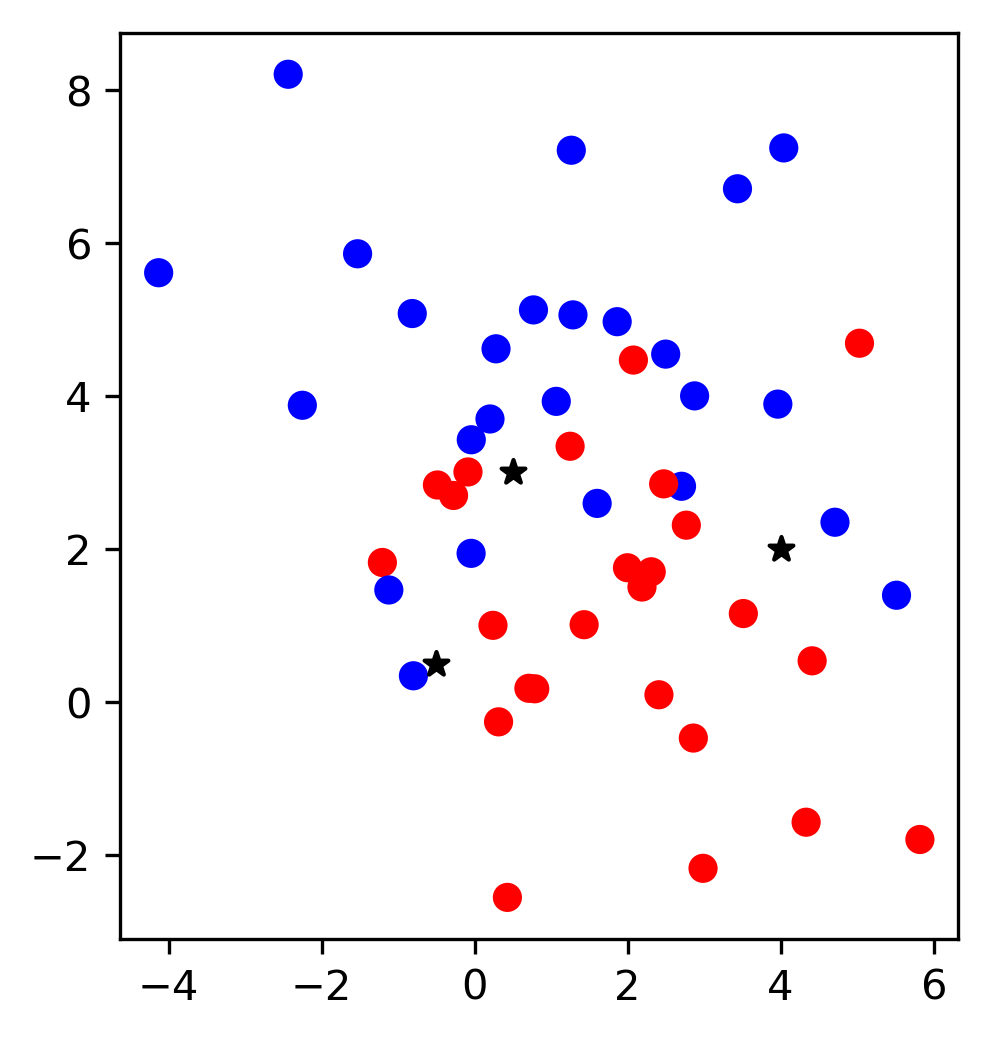

In [2]:
X_test = np.array([[0.5, 3], [4, 2], [-.5, .5]])

plt.figure()
plt.gca().set_aspect("equal")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X_test[:, 0], X_test[:, 1], c='k', marker="*")
plt.savefig("knn_boundary_test_points.png", bbox_inches='tight')

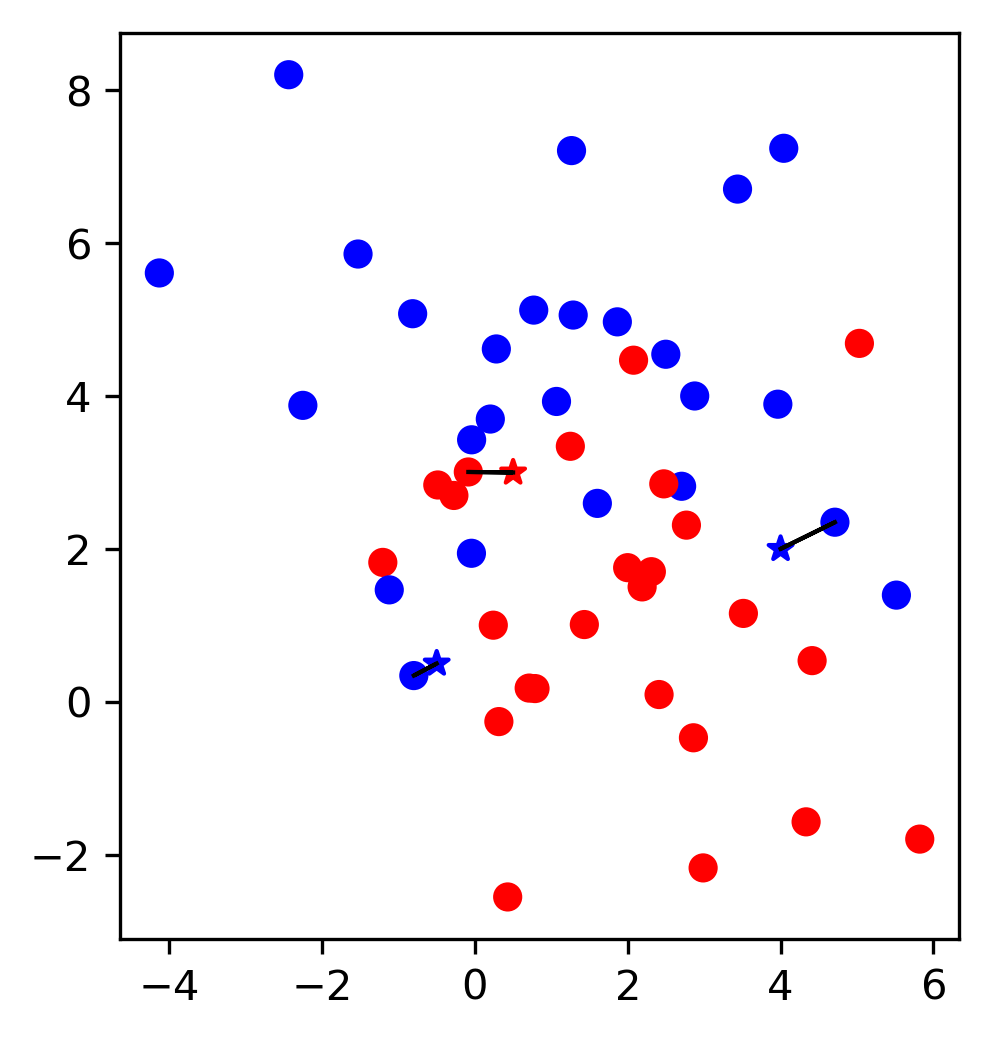

In [3]:
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

def plot_n_neighbors(X, y, n_neighbors=1):
    X_test = np.array([[0.5, 3], [4, 2], [-.5, .5]])
    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    plt.figure()
    plt.gca().set_aspect("equal")
    for x, neighbors in zip(X_test, closest.T):
        for neighbor in neighbors[:n_neighbors]:
            plt.arrow(x[0], x[1], X[neighbor, 0] - x[0],
                    X[neighbor, 1] - x[1], head_width=0, fc='k', ec='k')

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    test_points = plt.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), marker="*")
    training_points = plt.scatter(X[:, 0], X[:, 1], c=y)    
plot_n_neighbors(X, y)
plt.savefig("knn_boundary_k1.png", bbox_inches='tight')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))


accuracy: 0.62


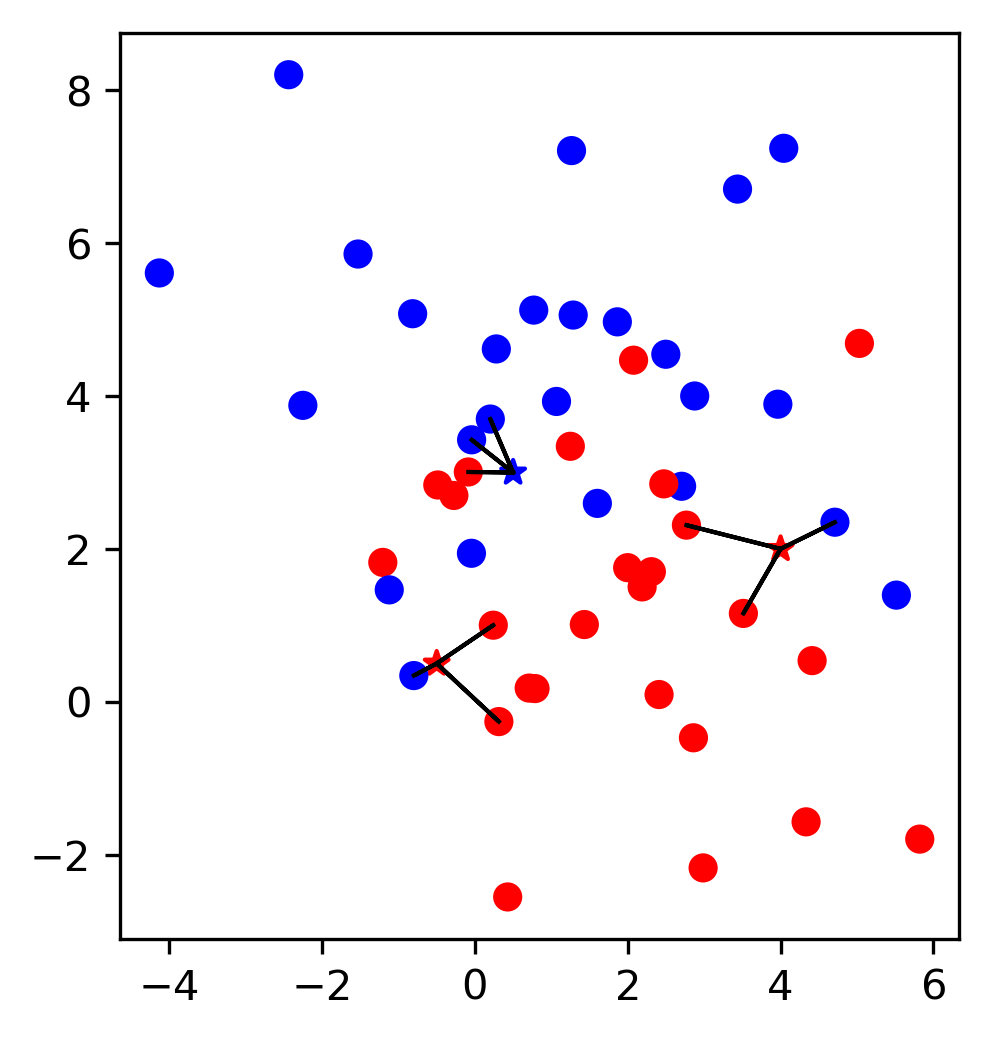

In [5]:
plot_n_neighbors(X, y, n_neighbors=3)
plt.savefig("knn_boundary_k3.png", bbox_inches='tight')

In [6]:
def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None, alpha=1):                                       
    # multiclass                                                                                                                 
    if eps is None:                                                                                                              
      eps = X.std() / 2.                                                                                                       

    if ax is None:                                                                                                               
      ax = plt.gca()                                                                                                           

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps                                                                      
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps                                                                      
    xx = np.linspace(x_min, x_max, 1000)                                                                                         
    yy = np.linspace(y_min, y_max, 1000)                                                                                         

    X1, X2 = np.meshgrid(xx, yy)                                                                                                 
    X_grid = np.c_[X1.ravel(), X2.ravel()]                                                                                       
    decision_values = classifier.predict(X_grid)                                                                                 
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,                                                           
                                                       y_min, y_max),                                                          
            aspect='auto', origin='lower', alpha=alpha)                                                               
    ax.set_xlim(x_min, x_max)                                                                                                    
    ax.set_ylim(y_min, y_max)                                                                                                    
    ax.set_xticks(())                                                                                                            
    ax.set_yticks(())  

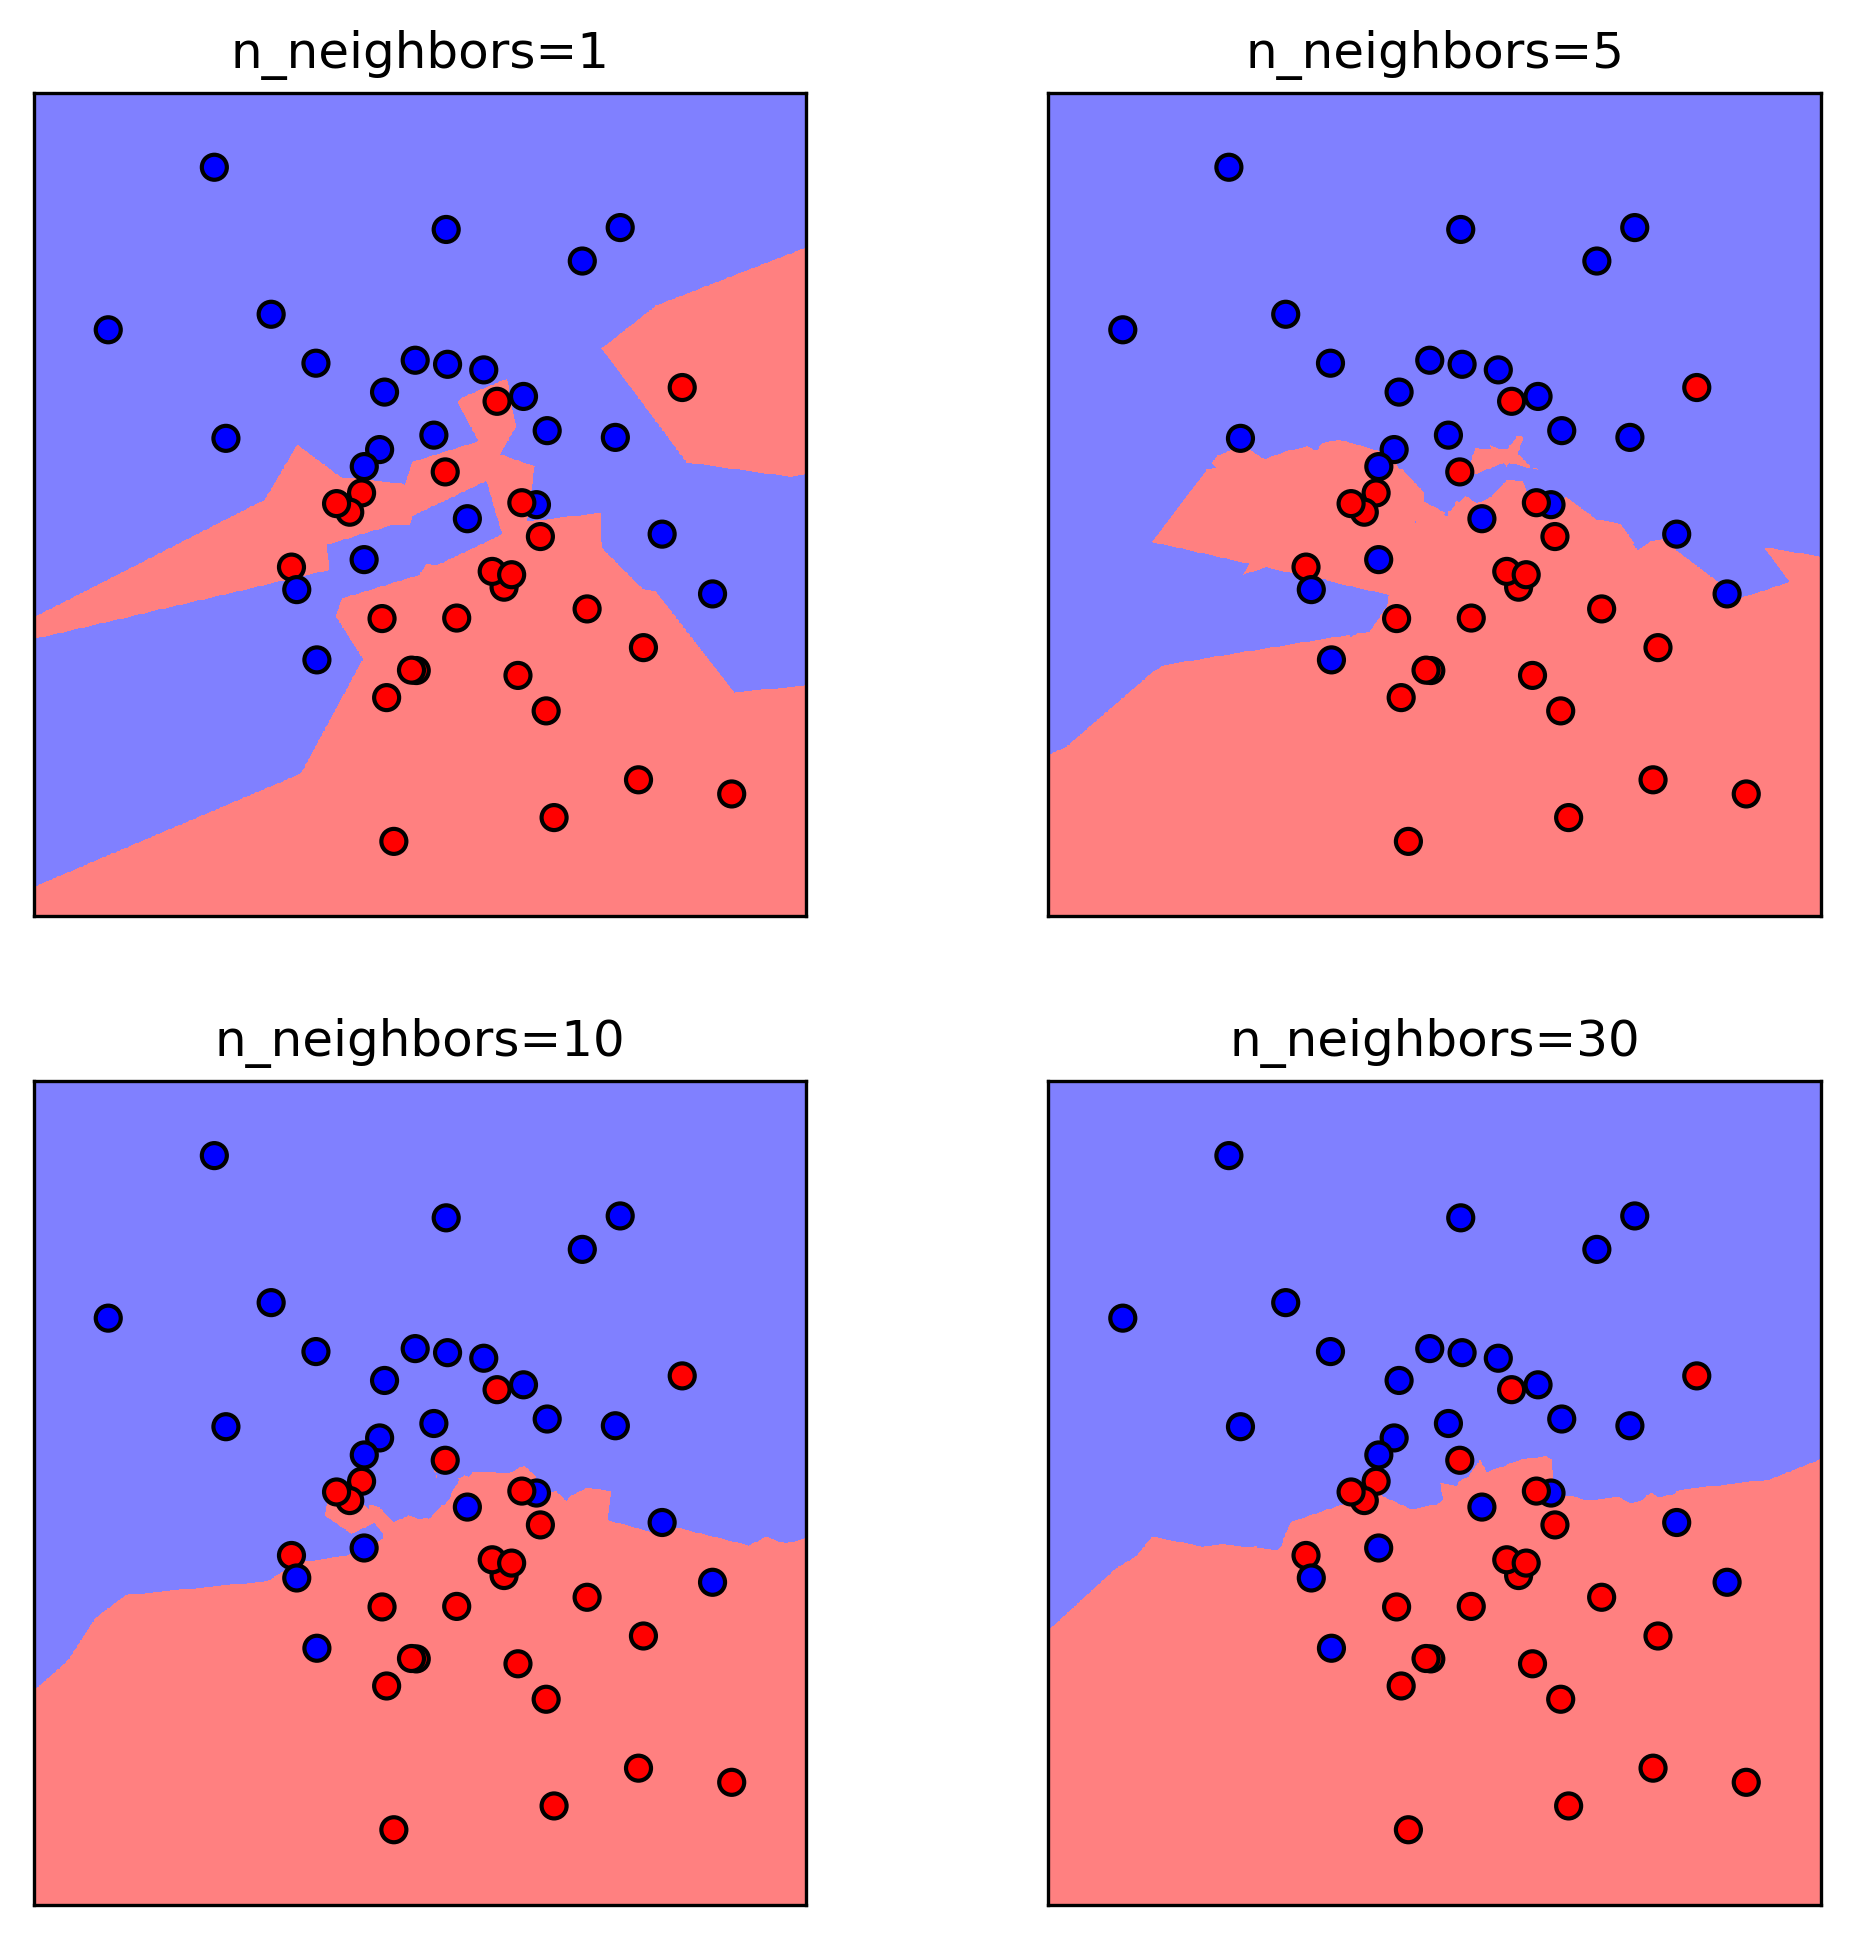

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for ax, n_neighbors in zip(axes.ravel(), [1, 5, 10, 30]):
    ax.set_title("n_neighbors={}".format(n_neighbors))
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plot_2d_classification(clf, X, ax=ax, alpha=.5)
    ax.set_aspect("equal")
plt.savefig("knn_boundary_varying_k.png", bbox_inches='tight')

## Model complexity
* compare training and test set scores for the different numbers of neighbors.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

neighbors = range(1, 30, 2)

training_scores = []
test_scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


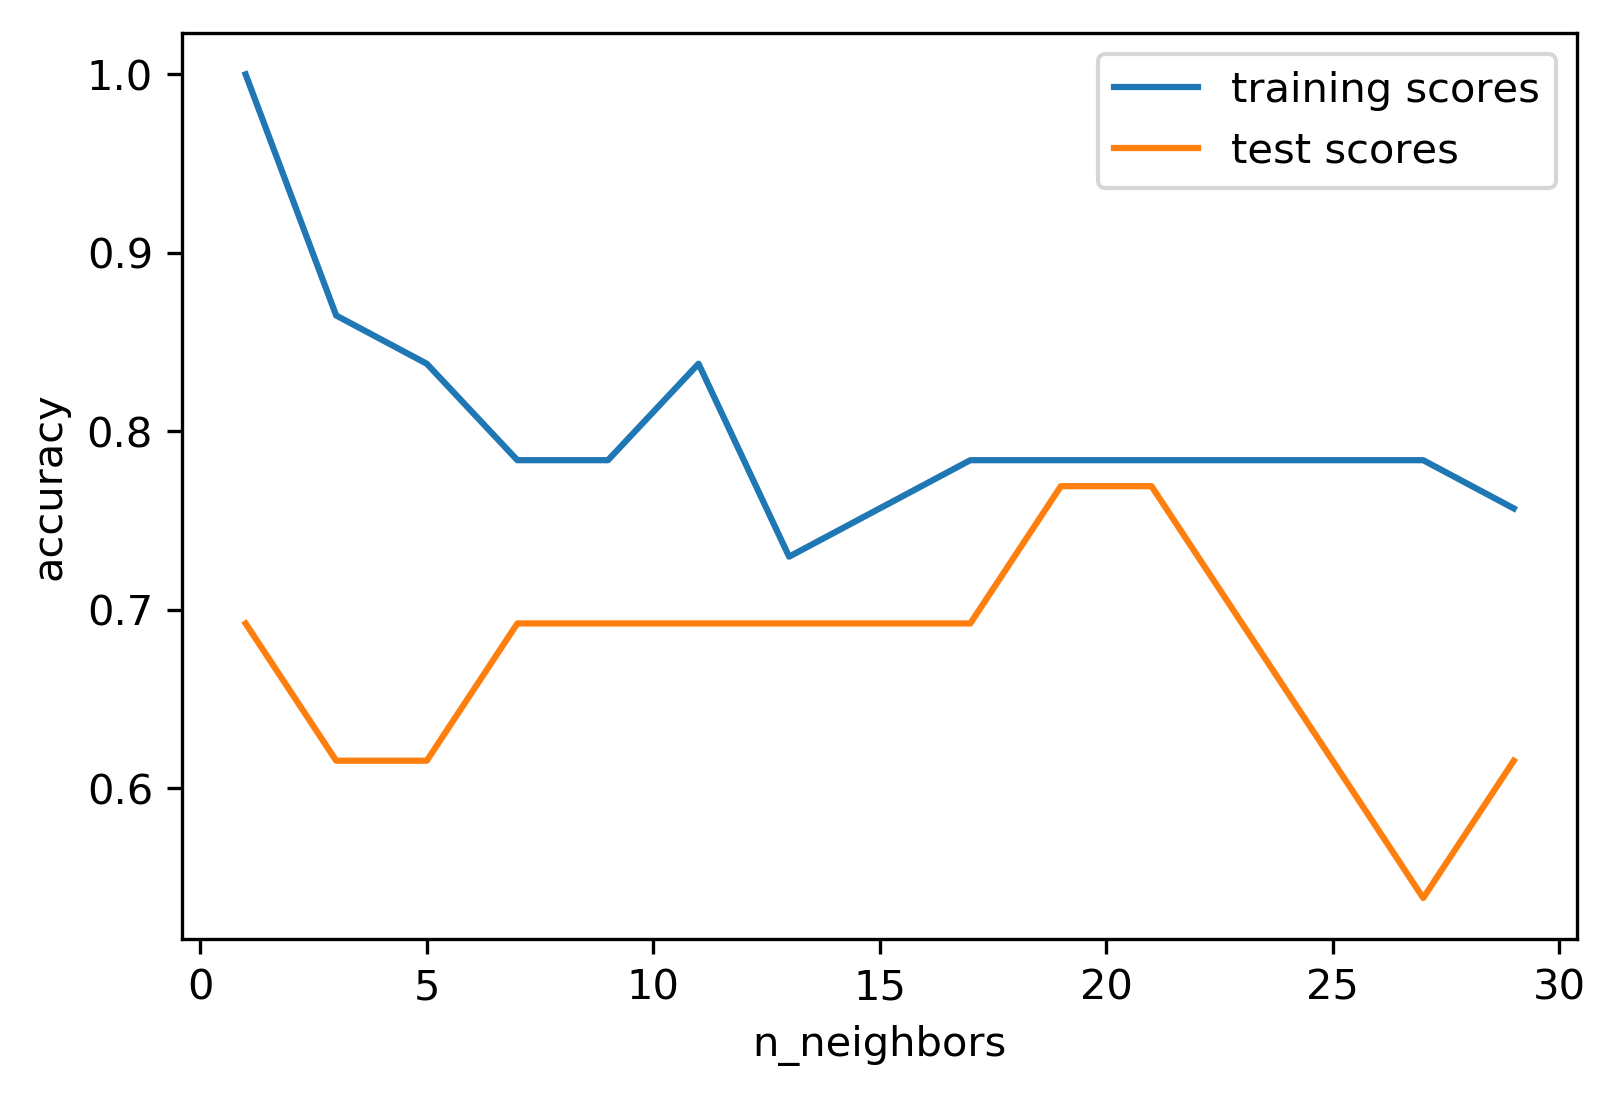

In [9]:
plt.figure()
plt.plot(neighbors, training_scores, label="training scores")
plt.plot(neighbors, test_scores, label="test scores")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig("knn_model_complexity.png", bbox_inches='tight')

# Threefold split
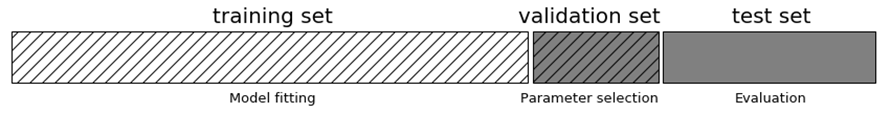

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors



data = load_breast_cancer()
X, y = data.data, data.target
X = scale(X)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, stratify=y, test_size=0.3,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval,  y_trainval,  stratify=y_trainval,test_size=0.3,random_state=0)
val_scores = []
neighbors = np.arange(1, 15, 2)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    val_sc=knn.score(X_val, y_val)
    val_scores.append(val_sc)
    print(" {:d}: {:.3f}  ".format(i,val_sc))
print("best validation score: {:.3f}".format(np.max(val_scores)))
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("best n_neighbors: {}".format(best_n_neighbors))
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_trainval, y_trainval)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))


 1: 0.950  
 3: 0.950  
 5: 0.958  
 7: 0.958  
 9: 0.958  
 11: 0.950  
 13: 0.942  
best validation score: 0.958
best n_neighbors: 5
test-set score: 0.947


# Cross validation
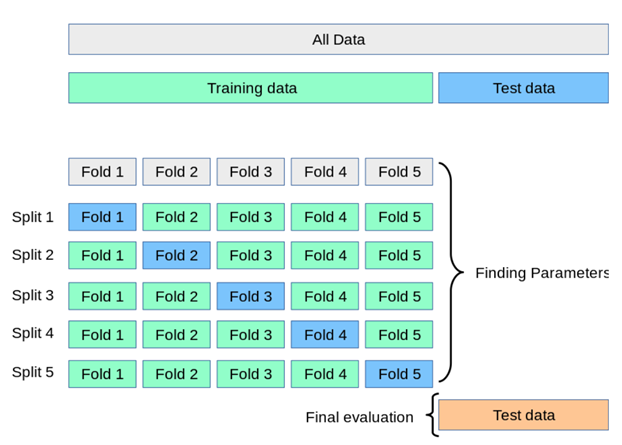

In [11]:
from sklearn.model_selection import cross_val_score

#X_train, X_test, y_train, y_test = train_test_split(X, y)

cross_val_scores = []

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_trainval, y_trainval, cv=10)
    mean_sc=np.mean(scores)
    cross_val_scores.append(mean_sc)
    print(" {:d}: {:.3f}  ".format(i,mean_sc))
    
print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("best n_neighbors: {}".format(best_n_neighbors))

knn2 = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn2.fit(X_trainval, y_trainval)
print("test-set score: {:.3f}".format(knn2.score(X_test, y_test)))

 1: 0.950  
 3: 0.965  
 5: 0.967  
 7: 0.972  
 9: 0.970  
 11: 0.970  
 13: 0.967  
best cross-validation score: 0.972
best n_neighbors: 7
test-set score: 0.947


In [12]:
np.set_printoptions(precision=2)

# GridSearchCV

In [13]:
from sklearn.model_selection import GridSearchCV

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)


param_grid = {'n_neighbors':  np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)
grid.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))


best mean cross-validation score: 0.972
best parameters: {'n_neighbors': 7}
test-set score: 0.947


In [14]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results.columns

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acces

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_n_neighbors', 'params', 'rank_test_score',
       'split0_test_score', 'split0_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [15]:
results.params

0     {'n_neighbors': 1}
1     {'n_neighbors': 3}
2     {'n_neighbors': 5}
3     {'n_neighbors': 7}
4     {'n_neighbors': 9}
5    {'n_neighbors': 11}
6    {'n_neighbors': 13}
Name: params, dtype: object

In [16]:
len(results)

7

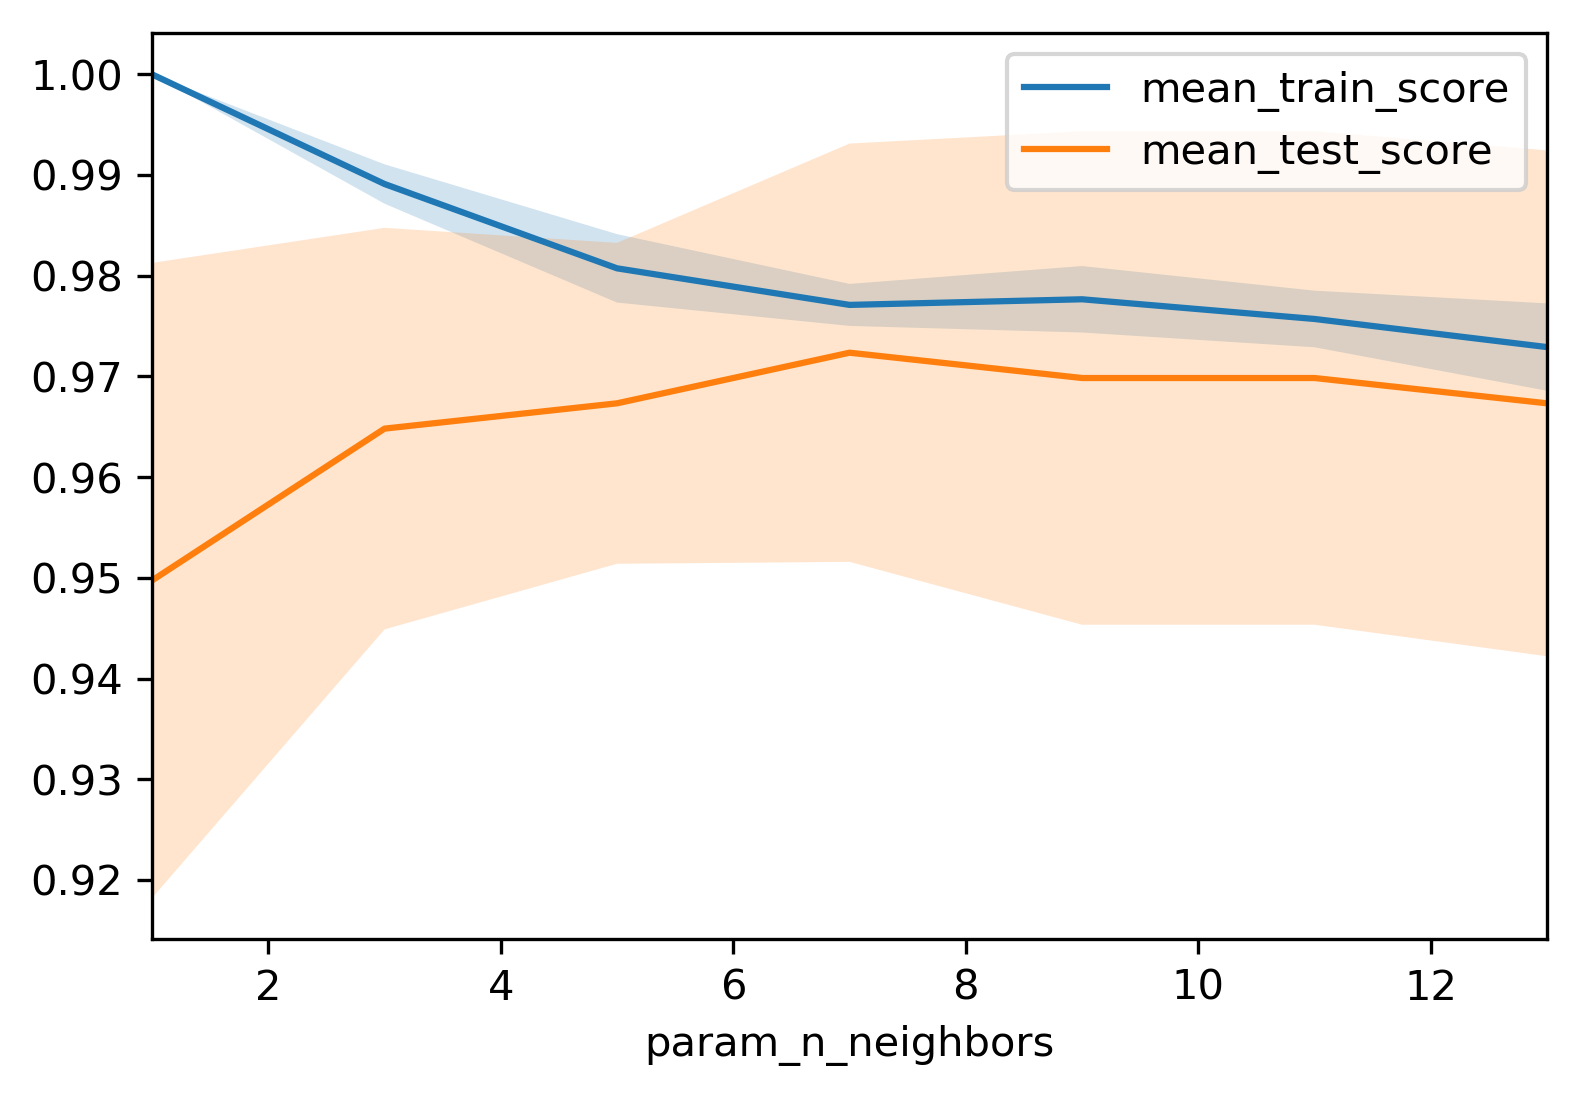

In [17]:
results.plot('param_n_neighbors', 'mean_train_score')
results.plot('param_n_neighbors', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_n_neighbors.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_neighbors.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.savefig("grid_search_n_neighbors.png", bbox_inches='tight')